<a href="https://colab.research.google.com/github/WittmannF/course/blob/master/day-4/assignment-3-cats-dogs-solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3 - Cats vs Dogs Classifier
In this project we are going to use transfer learning in order to buid a classifier to distinguish cats and dogs. As database, we will be using a subset from the Kaggle Competition: https://www.kaggle.com/c/dogs-vs-cats/. While the original dataset has 25000 images, you are going to use only 2000 images for training the model. As you will notice by the end of this project, thanks to transfer learning, we can get  great classification results even with smaller datasets. 

> **NOTE:** *Make sure to complete all the lines of code with a `TODO:` comment.*

## 1. Access the Dataset
Run the cells bellow in order to mount your Google Drive (if using colab) and download the dataset. The dataset is also available to be manually downloaded in [this repository](https://github.com/dl7days/datasets).

### 1.1 Mount Google Drive (if using Colab)
Let's mount Google Drive in order to download the dataset. This way you won't have to always download again the dataset when accessing the notebook.

In [1]:
import sys, os

MOUNT_GDRIVE = True # Choose Google Drive
USING_COLAB = 'google.colab' in sys.modules

# Update here with the folder of the files of your course
COURSE_DIRECTORY = '/content/drive/My Drive/course/day-3'

if MOUNT_GDRIVE and USING_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    
    # Create course directory if it doesn't exist (if not cloned from github)
    if not os.path.exists(COURSE_DIRECTORY):
        os.makedirs(COURSE_DIRECTORY)
    # Open course directory
    os.chdir(COURSE_DIRECTORY)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1.2 Download Dataset
Now, let's download the dataset if it is the first time you are running this cell (i.e., if the dataset folder was not found): 

In [2]:
import os

DATA_PATH = 'cats-dogs-data/'
DATA_URL = 'https://github.com/dl7days/datasets/raw/master/cats-dogs-data.zip'
ZIP_FILENAME = 'cats-dogs-data.zip'

if not os.path.exists(DATA_PATH):# If dataset folder doesn't exist
    try: # Then try downloading and unzipping it
        print("Downloading Dataset...")
        os.system(f"wget {DATA_URL}")

        print("Unzipping Dataset")
        os.system(f"unzip {ZIP_FILENAME}")

        print("Removing .zip file")
        os.system(f"rm {ZIP_FILENAME}")
    except Exception as e: # If there's an error, ask to download manually
        print(f"Something went wrong. Please download the dataset manually at {DATA_URL}")
        print(f'The following exception was thrown:\n{e}')
else:
    print(f'Dataset folder {DATA_PATH} has been found')

Dataset folder cats-dogs-data/ has been found


In [0]:
# Assign training and validation folders
TRAIN_PATH = f'{DATA_PATH}train/'
VALID_PATH = f'{DATA_PATH}valid/'

## 2. Visualize Images from the Dataset
Now, let's visualize some of the images available in the training folder. First let's load a list with all filepaths:

In [0]:
import glob

filepaths = glob.glob(TRAIN_PATH+'/cat/*.jpg')
for f in glob.glob(TRAIN_PATH+'/dog/*.jpg'):
    filepaths.append(f)

Now, let's visualize a random image from the dataset. Every time you run the next cell, a random image (either of a dog or a cat) is going to be displayed:

Using TensorFlow backend.


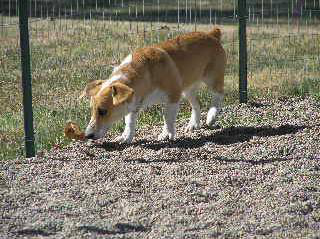

In [5]:
from keras.preprocessing.image import load_img
import random

load_img(random.choice(filepaths))

## 3. Applying Transfer Learning

### 3.1 Defining Image Data Generators
Your first task is to define a training and a validation generator for loading the dataset. Follow those steps:
1. First of al, you will choose any model of your choice in https://keras.io/applications to be imported (for example ResNet50)
2. Next, import the model itself and the `preprocess_input` function (for example `from keras.applications.resnet50 import ResNet50, preprocess_input`)
3. Import the ImageDataGenerator from the [image preprocessing module](https://keras.io/preprocessing/image/)
4. Initialize the data generator class including the argument `preprocessing_function` as the `preprocess_input` function imported from the transfer learning model. This way all images are going to be preprocessed in the same settings of the images that were trained in the imported model.
5. Define the training and validationg generators using the method `flow_from_directory`. 
    - Add the variables `TRAIN_PATH` and `VALID_PATH` as the path of each of each one. 
    - Set the dimension (224, 224) as the argument `target_size` (`TARGET_SHAPE[:2]` also works).
    - As class mode, choose 'sparse'

In [6]:
# TODO: Import the model and the preprocess_input function
from keras.applications.resnet50 import ResNet50, preprocess_input

# TODO: Import the ImageDataGenerator class
from keras.preprocessing.image import ImageDataGenerator

# Shape in which all images are going to be reshaped
TARGET_SHAPE = (224, 224, 3)

# TODO: Initialize the data generator class 
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# TODO: Create the training and validation generators using the method flow_from_directory
train_gen = datagen.flow_from_directory(TRAIN_PATH, target_size=TARGET_SHAPE[:2], class_mode='sparse')
valid_gen = datagen.flow_from_directory(VALID_PATH, target_size=TARGET_SHAPE[:2], class_mode='sparse')

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


### 3.2 Defining Base Model
Now you are going to define import a model from http://keras.io/applications, and add a fully connected layer in the end. Make sure to finish the following code:

In [7]:
# 1. TODO: Import any additional packages
from keras.models import Sequential
from keras.layers import Flatten, Dense, GlobalAveragePooling2D
from keras.applications.resnet50 import ResNet50

# 2. TODO: Initialize base model
base_model = ResNet50(include_top=False, input_shape=TARGET_SHAPE)

# 3. TODO: Freeze layers from the base model
for layer in base_model.layers:
    layer.trainable=False
    
# 4. TODO: Add Fully connected layer to the base model
model = Sequential([base_model,
                    GlobalAveragePooling2D(),
                    Dense(1024, activation='relu'),
                    Dense(2, activation='softmax')])

W0723 18:22:47.970316 140155958351744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 18:22:47.991755 140155958351744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 18:22:47.998967 140155958351744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0723 18:22:48.029126 140155958351744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0723 18:22:48.030481

### 3.3 Training Model
First let's compile the model. The optimizer and loss function as already been chosen for you. We are going to use as loss function `sparse_categorical_crossentropy` which is useful when the target contains classes represented as integer values (1 and 0 in our case). The learning rate of Adam was set to 1e-4 since the default value (1e-3) was too big and leading to unstabilities. We'll learning how to better define the learning rate in the next day. 

In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

W0723 18:23:02.749439 140155958351744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [9]:
model.fit_generator(train_gen, train_gen.n//train_gen.batch_size, epochs=3,
                    validation_data=valid_gen, validation_steps=valid_gen.n//valid_gen.batch_size)

W0723 18:23:02.868743 140155958351744 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/3
62/62 [==============================] - 593s 10s/step - loss: 0.1506 - acc: 0.9405 - val_loss: 0.0426 - val_acc: 0.9818
Epoch 2/3
62/62 [==============================] - 19s 308ms/step - loss: 0.0460 - acc: 0.9844 - val_loss: 0.0519 - val_acc: 0.9891
Epoch 3/3
62/62 [==============================] - 18s 293ms/step - loss: 0.0479 - acc: 0.9834 - val_loss: 0.0517 - val_acc: 0.9891


## 4. Visualize Predictions
Finally, let's confirm our model is predicting well by using online external sources. Find 5 urls to jpb images of either cats or dogs and fill the `URLS` list. For example:
```
URLS = ['http://example.com/image1.jpg',
        'http://example.com/image2.jpg',
        'http://example.com/image3.jpg',
        'http://example.com/image4.jpg',
        'http://example.com/image5.jpg']
        
```

In [0]:
URLS = ['https://upload.wikimedia.org/wikipedia/commons/6/66/An_up-close_picture_of_a_curious_male_domestic_shorthair_tabby_cat.jpg',
        'https://images.pexels.com/photos/20787/pexels-photo.jpg',
        'https://upload.wikimedia.org/wikipedia/commons/9/9e/Tabby_cat-3337027.jpg',
        'https://images.pexels.com/photos/162349/dog-hybrid-animal-lying-162349.jpeg',
        'https://images.pexels.com/photos/356378/pexels-photo-356378.jpeg']

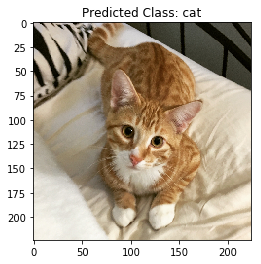

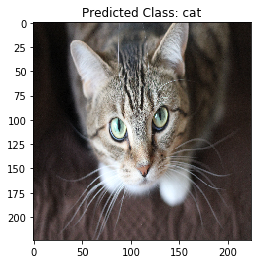

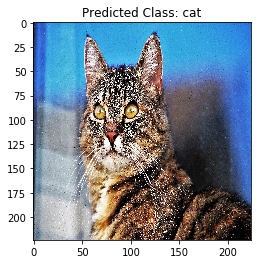

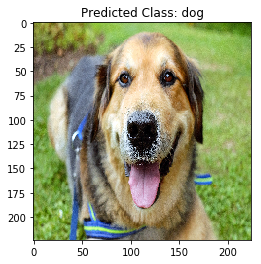

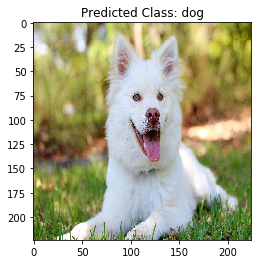

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image

def predict_from_url(model, train_gen, url, target_shape=(224,224)):
    
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize(target_shape)

    # Convert to a Numpy array
    img_np = np.asarray(img)

    # Reshape by adding 1 in the beginning to be compatible as input of the model
    img_np = img_np[None] # https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#numpy.newaxis

    # Prepare the image for the model
    img_np = preprocess_input(img_np)

    # Decode output of model into classes and probabilities
    result = model.predict(img_np)
 
    class_indices = train_gen.class_indices    
    index_to_class = {v: k for k, v in class_indices.items()}
    
    # Displaying image
    plt.imshow(img)
    plt.title(f'Predicted Class: {index_to_class[result.argmax()]}')
    plt.show()
    
for url in URLS:
    predict_from_url(model, train_gen, url, target_shape=TARGET_SHAPE[:2])  